<a href="https://colab.research.google.com/github/asabbah44/Text_Classification/blob/main/SVM_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from bs4 import BeautifulSoup
%matplotlib inline
from sklearn.utils import resample
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/mydatasetfinal.csv')


df1 = pd.DataFrame(df1, columns = ['commenttext','label'])
df2 = pd.DataFrame(df2, columns = ['commenttext','label'])

df=pd.concat([df1,df2])


print(df.head(10))
print(df['commenttext'].apply(lambda x: len(x.split(' '))).sum())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
                                         commenttext   label
0            // FIXME formatters are not thread-safe  Defect
1  // XXX: (Jon Skeet) The comment "if it hasn't ...  Defect
2  // I hate to admit it, but we don't know what ...  Defect
3  // Just a note: StarTeam has a status for NEW ...  Defect
4  // the generated classes must not be added in ...  Defect
5  // todo: is this comment still relevant ?? // ...  Defect
6  // This is turned off temporarily. There appea...  Defect
7  // pattern now holds ** while string is not ex...  Defect
8  // FIXME: Is "No Namespace is Empty Namespace"...  Defect
9  // FIXME this is actually not very cpu cycles ...  Defect
151162


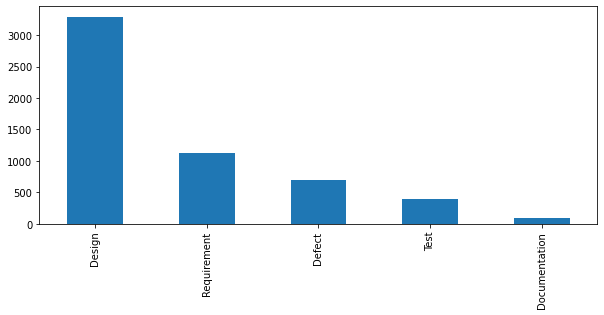

In [2]:
my_tags = ['DESIGN','IMPLEMENTATION','DEFECT','TEST','DOCUMENTATION']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [3]:
def print_plot(index):
    example = df[df.index == index][['commenttext', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

print_plot(500)

// TODO should this be done even if not a full test plan? // and what if load fails?
Tag: Test


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

from Utility import preprocess
# df["commenttext"] = df["commenttext"].apply(lambda x: x.lower())

# # Clean the text
# df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_text(x))

# # Clean numbers
# df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_numbers(x))

# # Clean Contractions
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.replace_contractions(x))
 
# df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_punc(x))

# # lemmatize
df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.lemmatize(x))
# # remove stop word and custome word such as todo
# df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.custm_stopwords_remove(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text

    Cust_words = ['todo','fixme']
    stop = set(stopwords.words('english'))
    for word in  Cust_words:
        STOPWORDS.add(word)
    text = ' '.join(word for word in text.split() if word not in stop)

    return text
    
df['commenttext'] = df['commenttext'].apply(clean_text)
print_plot(500)

done even full test plan load fails
Tag: Test


In [6]:
X = df.commenttext
y = df.label
              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

# df= pd.concat([X_train, y_train],axis=1)
# df=pd.DataFrame(df, columns = ['commenttext','label'])

# print(len(df))
# df_majority = df[df.label=='Design']
# df_minority1 = df[df.label=='Requirement']
# df_minority2 = df[df.label=='Test']
# df_minority3 = df[df.label=='Defect']
# df_minority4 = df[df.label=='Documentation']

# print("Count:")
# print(len(df_majority) , len(df_minority1) , len(df_minority2), len(df_minority3), len(df_minority4))

# df_minority1_upsampled = resample(df_minority1, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=2250 ,  # to match majority class
#                                  random_state=123) # reproducible results

# df_minority2_upsampled = resample(df_minority2, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=2250,    # to match majority class
#                                  random_state=123) # reproducible results

# df_minority3_upsampled = resample(df_minority3, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=2250,    # to match majority class
#                                  random_state=123) # reproducible results

# df_minority4_upsampled = resample(df_minority4, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=2250,    # to match majority class
#                                  random_state=123) # reproducible results                              
                                 

# df = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled, df_minority3_upsampled, df_minority4_upsampled])

# X = df.commenttext
# y = df.label

# X_train, X_test_skip, y_train, y_test_skip = train_test_split(X, y, test_size=0.3, random_state = 42)





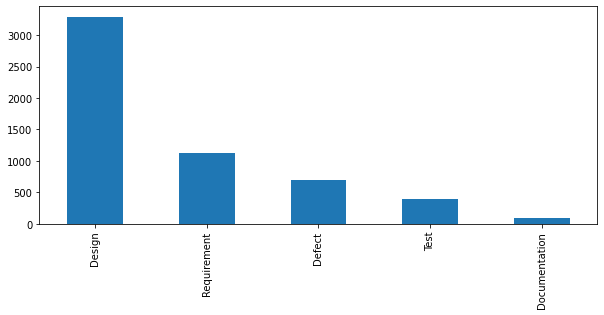

In [7]:
my_tags = ['DESIGN','IMPLEMENTATION','DEFECT','TEST','DOCUMENTATION']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

Naive Bayes Classifier for Multinomial Models

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))


accuracy 0.6553267681289168
                precision    recall  f1-score   support

        DESIGN       1.00      0.11      0.20       125
IMPLEMENTATION       0.64      1.00      0.78       677
        DEFECT       0.00      0.00      0.00        18
          TEST       0.89      0.16      0.27       217
 DOCUMENTATION       1.00      0.12      0.22        80

      accuracy                           0.66      1117
     macro avg       0.71      0.28      0.29      1117
  weighted avg       0.74      0.66      0.56      1117



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Linear Support Vector Machine



In [9]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=10, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7188898836168308
                precision    recall  f1-score   support

        DESIGN       0.95      0.16      0.27       125
IMPLEMENTATION       0.69      0.98      0.81       677
        DEFECT       1.00      0.22      0.36        18
          TEST       0.86      0.23      0.36       217
 DOCUMENTATION       0.83      0.80      0.82        80

      accuracy                           0.72      1117
     macro avg       0.87      0.48      0.53      1117
  weighted avg       0.77      0.72      0.66      1117



In [10]:
pip install scikit-plot

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(y_train.values)
test_y = le.transform(y_test.values)



In [12]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=400)),
               ])
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7341092211280215
                precision    recall  f1-score   support

        DESIGN       0.52      0.57      0.54       125
IMPLEMENTATION       0.82      0.80      0.81       677
        DEFECT       0.81      0.72      0.76        18
          TEST       0.56      0.57      0.57       217
 DOCUMENTATION       0.81      0.86      0.84        80

      accuracy                           0.73      1117
     macro avg       0.71      0.71      0.70      1117
  weighted avg       0.74      0.73      0.74      1117



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


rf=Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf',RandomForestClassifier()),
               ])
model=rf.fit(X_train, y_train)

ytest = np.array(y_test)
y_pred = rf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))



data=pd.DataFrame()
data["A"]=X_test
data["b"]=y_test
data["pred"]=y_pred

#data.to_csv("/content/drive/MyDrive/Colab Notebooks/Data/test.csv")
print(data)

accuracy 0.7824529991047449
               precision    recall  f1-score   support

       Defect       0.86      0.39      0.54       125
       Design       0.80      0.92      0.85       677
Documentation       0.76      0.72      0.74        18
  Requirement       0.69      0.56      0.62       217
         Test       0.80      0.85      0.82        80

     accuracy                           0.78      1117
    macro avg       0.78      0.69      0.72      1117
 weighted avg       0.78      0.78      0.77      1117

[[ 49  57   1  11   7]
 [  4 622   0  43   8]
 [  0   5  13   0   0]
 [  2  89   2 122   2]
 [  2   9   1   0  68]]
                                                      A  ...         pred
3835  always add plugins good way compare plugin zip...  ...       Design
1033  create empty initialized instance uml permissi...  ...       Design
79                 become single empty argument pr 5906  ...       Design
167                             milliseconds properties  ...  

In [14]:
from sklearn.neighbors import KNeighborsClassifier



text_clf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier()),
               ])
text_clf.fit(X_train, y_train)

y_pred = text_clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5953446732318711
                precision    recall  f1-score   support

        DESIGN       0.61      0.30      0.40       125
IMPLEMENTATION       0.78      0.67      0.72       677
        DEFECT       0.62      0.56      0.59        18
          TEST       0.35      0.72      0.47       217
 DOCUMENTATION       1.00      0.09      0.16        80

      accuracy                           0.60      1117
     macro avg       0.67      0.47      0.47      1117
  weighted avg       0.69      0.60      0.59      1117



In [15]:
from sklearn.neighbors import KNeighborsClassifier



text_clf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier()),
               ])
text_clf.fit(X_train, y_train)

y_pred = text_clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5953446732318711
                precision    recall  f1-score   support

        DESIGN       0.61      0.30      0.40       125
IMPLEMENTATION       0.78      0.67      0.72       677
        DEFECT       0.62      0.56      0.59        18
          TEST       0.35      0.72      0.47       217
 DOCUMENTATION       1.00      0.09      0.16        80

      accuracy                           0.60      1117
     macro avg       0.67      0.47      0.47      1117
  weighted avg       0.69      0.60      0.59      1117



In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier()),
               ])
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7287376902417189
                precision    recall  f1-score   support

        DESIGN       0.52      0.58      0.55       125
IMPLEMENTATION       0.83      0.78      0.81       677
        DEFECT       0.74      0.78      0.76        18
          TEST       0.55      0.59      0.57       217
 DOCUMENTATION       0.78      0.86      0.82        80

      accuracy                           0.73      1117
     macro avg       0.68      0.72      0.70      1117
  weighted avg       0.74      0.73      0.73      1117



In [17]:
from sklearn.svm import SVC,LinearSVC,LinearSVR

svc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC()),
               ])
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))


accuracy 0.7636526410026858
                precision    recall  f1-score   support

        DESIGN       0.83      0.32      0.46       125
IMPLEMENTATION       0.74      0.98      0.84       677
        DEFECT       0.89      0.44      0.59        18
          TEST       0.87      0.38      0.53       217
 DOCUMENTATION       0.86      0.78      0.82        80

      accuracy                           0.76      1117
     macro avg       0.84      0.58      0.65      1117
  weighted avg       0.79      0.76      0.73      1117



In [18]:
linearSVC = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC()),
               ])
linearSVC.fit(X_train, y_train)

y_pred = linearSVC.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7681289167412713
                precision    recall  f1-score   support

        DESIGN       0.67      0.50      0.57       125
IMPLEMENTATION       0.81      0.88      0.84       677
        DEFECT       0.87      0.72      0.79        18
          TEST       0.63      0.54      0.58       217
 DOCUMENTATION       0.83      0.89      0.86        80

      accuracy                           0.77      1117
     macro avg       0.76      0.71      0.73      1117
  weighted avg       0.76      0.77      0.76      1117



In [19]:
from sklearn.linear_model import SGDClassifier

SGD = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])
SGD.fit(X_train, y_train)

y_pred = SGD.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7699194270367055
                precision    recall  f1-score   support

        DESIGN       0.59      0.51      0.55       125
IMPLEMENTATION       0.81      0.88      0.84       677
        DEFECT       0.87      0.72      0.79        18
          TEST       0.69      0.54      0.61       217
 DOCUMENTATION       0.82      0.89      0.85        80

      accuracy                           0.77      1117
     macro avg       0.75      0.71      0.73      1117
  weighted avg       0.76      0.77      0.76      1117

